In [38]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [39]:
data = pd.read_csv('PopulationByAgeSex-Copy1.csv',index_col='Time',parse_dates=True)

In [40]:
data

,Id,LocID,Location,PopMale_0_4,PopFemale_0_4,PopTotal_0_4,PopMale_5_9,PopFemale_5_9,PopTotal_5_9,PopMale_10_14,...,PopMale_95_99,PopFemale_95_99,PopTotal_95_99,PopMale_100Plus,PopFemale_100Plus,PopTotal_100Plus,PopMale,PopFemale,PopTotal,YearDataCompleted
Time,,,,,,,,,,,,,,,,,,,,,
1950-01-01,1,4,Afghanistan,630.044,661.578,1291.622,516.206,487.335,1003.541,461.378,...,0.004,0.003,0.007,0.000,0.000,0.000,4099.243,3652.874,7752.117,1
1951-01-01,2,4,Afghanistan,641.199,673.293,1314.492,525.302,502.402,1027.704,465.611,...,0.007,0.005,0.012,0.000,0.000,0.000,4134.756,3705.395,7840.151,1
1952-01-01,3,4,Afghanistan,650.825,669.274,1320.099,533.097,521.672,1054.769,471.928,...,0.012,0.009,0.021,0.000,0.000,0.000,4174.450,3761.546,7935.996,1
1953-01-01,4,4,Afghanistan,659.896,663.606,1323.502,538.351,541.216,1079.567,480.448,...,0.015,0.013,0.028,0.000,0.000,0.000,4218.336,3821.348,8039.684,1
1954-01-01,5,4,Afghanistan,670.694,663.295,1333.989,540.820,557.196,1098.016,489.780,...,0.014,0.011,0.025,0.000,0.000,0.000,4266.484,3884.832,8151.316,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2096-01-01,66889,716,Zimbabwe,953.505,939.918,1893.423,968.045,956.123,1924.168,992.221,...,3.108,11.248,14.356,0.142,0.883,1.025,15008.463,15932.316,30940.779,1
2097-01-01,66890,716,Zimbabwe,950.059,936.463,1886.522,963.764,951.798,1915.562,986.112,...,4.189,13.881,18.070,0.154,0.947,1.101,15008.822,15943.386,30952.208,1
2098-01-01,66891,716,Zimbabwe,946.047,932.455,1878.502,959.864,947.789,1907.653,980.369,...,5.003,15.945,20.948,0.169,1.022,1.191,15007.570,15952.241,30959.811,1


In [41]:
data[['PopMale','PopFemale','PopTotal']].describe()

,PopMale,PopFemale,PopTotal
count,6.689300e+04,6.689300e+04,6.689300e+04
mean,3.395770e+05,3.354644e+05,6.750414e+05
std,7.439528e+05,7.319416e+05,1.475830e+06
min,6.812000e+00,6.889000e+00,1.376300e+01
25%,3.286896e+03,3.269616e+03,6.585116e+03
50%,3.443957e+04,3.460833e+04,6.963185e+04
75%,3.174896e+05,3.221890e+05,6.403540e+05
max,5.445805e+06,5.429588e+06,1.087539e+07


In [42]:
DataLocation = data['Location'].unique()

In [43]:
DataLocation

array(['Afghanistan', 'Africa', 'African Group', 'African Union',
       'African Union: Central Africa', 'African Union: Eastern Africa',
       'African Union: Northern Africa', 'African Union: Southern Africa',
       'African Union: Western Africa',
       'African; Caribbean and Pacific (ACP) Group of States', 'Albania',
       'Algeria', 'Andean Community', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia',
       'Asia-Pacific Economic Cooperation (APEC)', 'Asia-Pacific Group',
       'Association of Southeast Asian Nations (ASEAN)', 'Australia',
       'Australia/New Zealand', 'Austria', 'Azerbaijan', 'BRIC', 'BRICS',
       'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus',
       'Belgium', 'Belize', 'Belt-Road Initiative (BRI)',
       'Belt-Road Initiative: Africa', 'Belt-Road Initiative: Asia',
       'Belt-Road Initiative: Europe',
       'Belt-Road Initiative: Latin America and the Caribbean',
       'Belt-Road Initiative: Pacific', 

## we are going to create three dictionaries which will contain:
1-the total population of each country and continent
2-the male population of each country and continent
3-the female population of each country and continent

In [79]:
contries = dict()
popMale = dict()
popFemale = dict()
for i in DataLocation:
    contries.update({i : data[data['Location']== i]['PopTotal'].sum(axis=0)})
    popMale.update({i : data[data['Location'] == i]['PopMale'].sum(axis=0)})
    popFemale.update({i : data[data['Location'] == i]['PopFemale'].sum(axis=0)})

## let's create a function that will allow us to calculate the share of a region in its continent

In [45]:
def pourcentage_pop(arg,continent):
    return (arg/continent)*100

## let's analyze the distribution of the African population

## let's get the data from each region

In [46]:
afrique = contries['Africa']
afriqueCentrale = contries['African Union: Central Africa']
afriqueDeLEst = contries['African Union: Eastern Africa']
afriqueDeLOuest = contries['African Union: Western Africa']
afriqueDuNord = contries['African Union: Northern Africa']
afriqueDuSud = contries['African Union: Southern Africa']

In [47]:
pourcentageAfriqueCentrale = pourcentage_pop(afriqueCentrale,afrique)
pourcentageAfriqueDeLEst = pourcentage_pop(afriqueDeLEst,afrique)
pourcentageAfriqueDeLOuest = pourcentage_pop(afriqueDeLOuest,afrique)
pourcentageAfriqueDuNord = pourcentage_pop(afriqueDuNord,afrique)
pourcentageAfriqueDuSud = pourcentage_pop(afriqueDuSud,afrique)

## let's display the result in the form of a graph

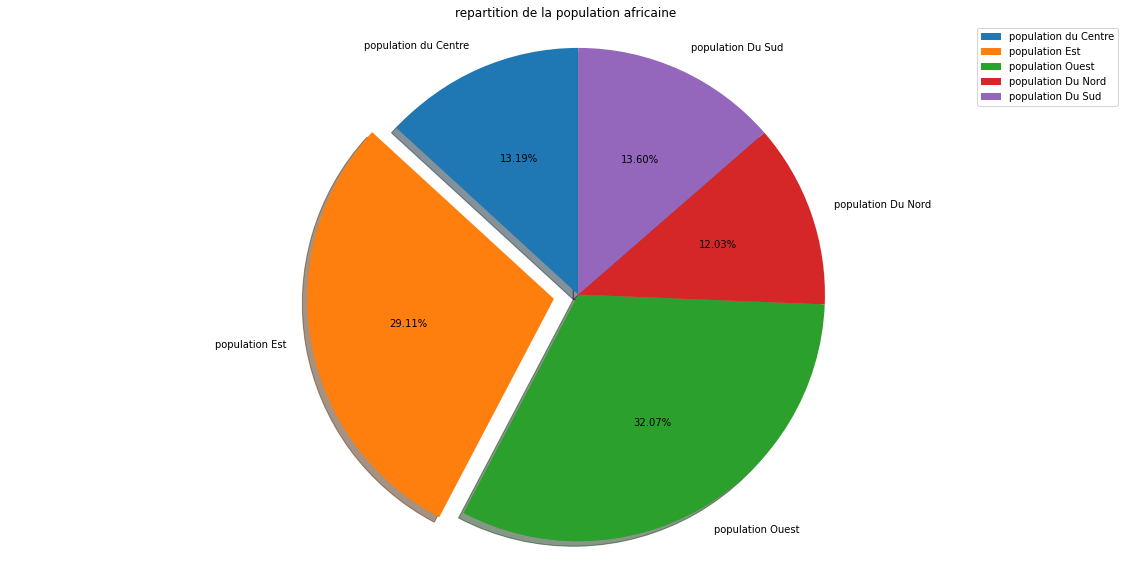

In [48]:
sizes = [pourcentageAfriqueCentrale,pourcentageAfriqueDeLEst,pourcentageAfriqueDeLOuest,pourcentageAfriqueDuNord,pourcentageAfriqueDuSud]
labels = ['population du Centre','population Est','population Ouest','population Du Nord','population Du Sud']
explode = (0, 0.1,0, 0, 0)

fig1, ax1 = plt.subplots(figsize=(20,10))
ax1.pie(sizes,explode=explode,labels=labels, autopct='%2.2f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('repartition de la population africaine')
plt.legend()
plt.show()

## let's analyse  the distribution of the Asan population

In [49]:
Asie = contries['Asia']
Asie_Centrale = contries['Central Asia']
Asie_De_LEst = contries['Eastern Asia']
Asie_De_LOuest = contries['Western Asia']
Asie_Du_Nord = data[data['Location']=='Northern Asia']['PopTotal'].sum(axis=0)
Asie_Du_Sud = contries['Southern Asia']

In [50]:
pourcentage_asie_centrale = pourcentage_pop(Asie_Centrale,Asie)
pourcentage_asie_Est = pourcentage_pop(Asie_De_LEst,Asie)
pourcentage_asie_Ouest = pourcentage_pop(Asie_De_LOuest,Asie)
pourcentage_asie_Nord = pourcentage_pop(Asie_Du_Nord,Asie)
pourcentage_asie_Sud = pourcentage_pop(Asie_Du_Sud,Asie)

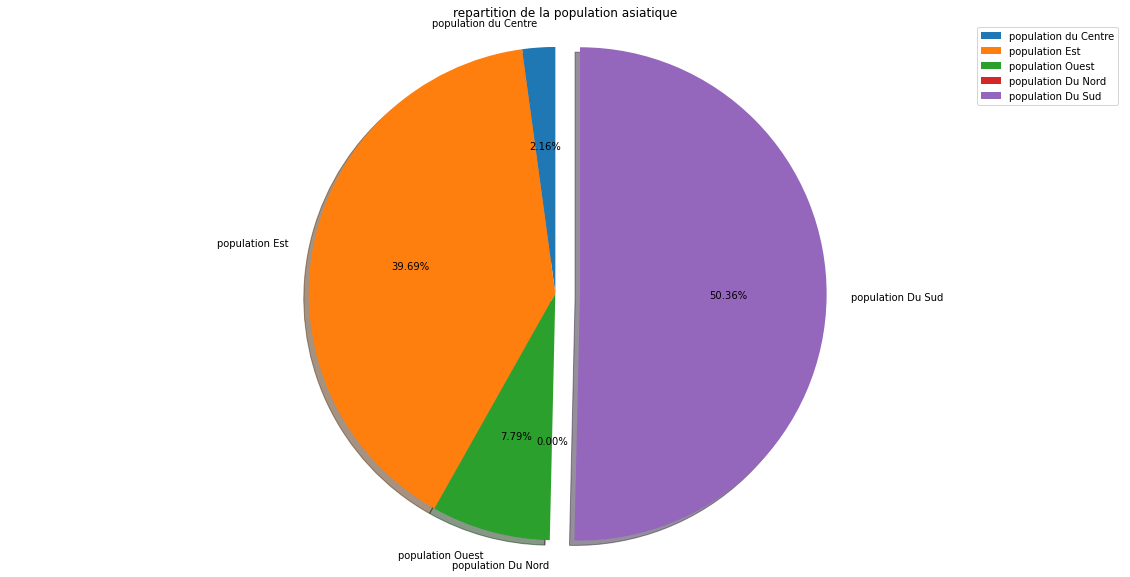

In [51]:
sizes = [pourcentage_asie_centrale,pourcentage_asie_Est,pourcentage_asie_Ouest,pourcentage_asie_Nord,pourcentage_asie_Sud]
labels = ['population du Centre','population Est','population Ouest','population Du Nord','population Du Sud']
explode = (0,0,0,0,0.1)

fig1, ax1 = plt.subplots(figsize=(20,10))
ax1.pie(sizes,explode=explode,labels=labels, autopct='%2.2f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('repartition de la population asiatique')
plt.legend()
plt.show()

## let's analyse  the distribution of the European population

In [52]:
Europe = contries['Europe']
europe_Centrale = contries['Central European Free Trade Agreement (CEFTA)']
europe_De_LEst = contries['Eastern Europe']
europe_De_LOuest = contries['Western Europe']
europe_Du_Nord = contries['Northern Europe']
europe_Du_Sud = contries['Southern Europe']

In [53]:
part_europe_centrale = pourcentage_pop(europe_Centrale,Europe)
part_europe_De_Lest = pourcentage_pop(europe_De_LEst,Europe)
part_europe_De_LOuest = pourcentage_pop(europe_De_LOuest,Europe)
part_europe_Du_Nord = pourcentage_pop(europe_Du_Nord,Europe)
part_europe_Du_Sud = pourcentage_pop(europe_Du_Sud,Europe)

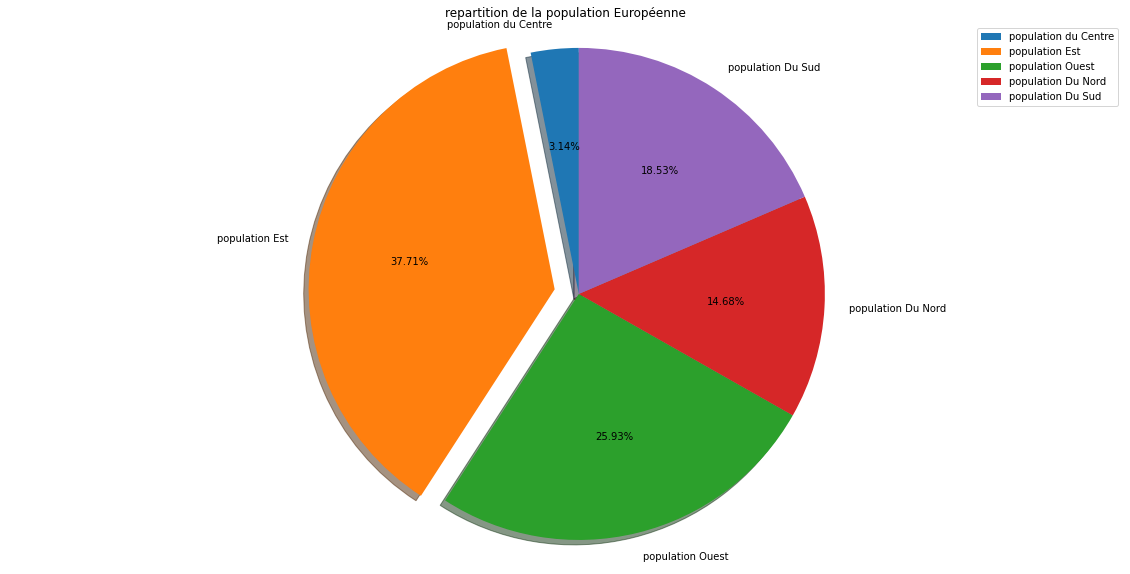

In [54]:
sizes = [part_europe_centrale,part_europe_De_Lest,part_europe_De_LOuest,part_europe_Du_Nord,part_europe_Du_Sud]
labels = ['population du Centre','population Est','population Ouest','population Du Nord','population Du Sud']
explode = (0,0.1,0,0,0)

fig1, ax1 = plt.subplots(figsize=(20,10))
ax1.pie(sizes,explode=explode,labels=labels, autopct='%2.2f%%',shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('repartition de la population Européenne')
plt.legend()
plt.show()

## let's analyze the distribution of the population by sex in the different continents

In [55]:
def pourcentage_popMale(arg,continent):
    return (arg/continent)*100

# Afrique

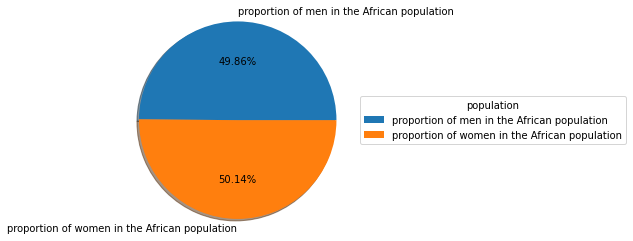

In [56]:
sizes = [pourcentage_popMale(popMale['Africa'],afrique),pourcentage_popMale(popFemale['Africa'],afrique)]
labels = ['proportion of men in the African population','proportion of women in the African population']

fig1,ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%2.2f%%',shadow=True, startangle=0)
ax1.legend(title="population", loc="center left", bbox_to_anchor=(0.85, 0, 0.5, 1))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Europe

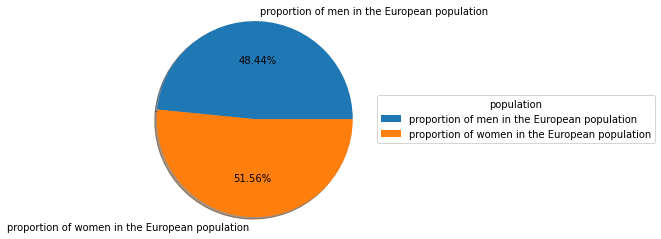

In [57]:
sizes = [pourcentage_popMale(popMale['Europe'],Europe),pourcentage_popMale(popFemale['Europe'],Europe)]
labels = ['proportion of men in the European population','proportion of women in the European population']

fig1,ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%2.2f%%',shadow=True, startangle=0)
ax1.legend(title="population", loc="center left", bbox_to_anchor=(0.85, 0, 0.5, 1))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Asie

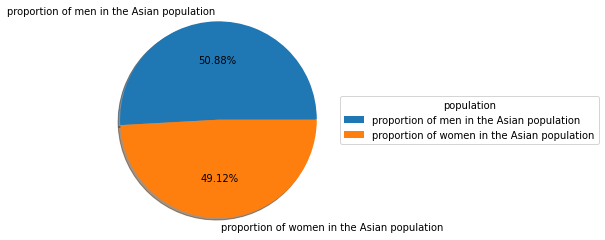

In [58]:
sizes = [pourcentage_popMale(popMale['Asia'],Asie),pourcentage_popMale(popFemale['Asia'],Asie)]
labels = ['proportion of men in the Asian population','proportion of women in the Asian population']

fig1,ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%2.2f%%',shadow=True, startangle=0)
ax1.legend(title="population", loc="center left", bbox_to_anchor=(0.85, 0, 0.5, 1))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Amerique du nord

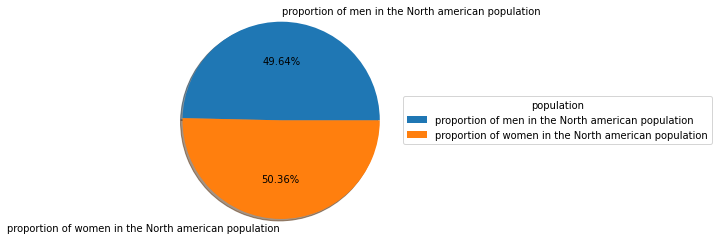

In [59]:
sizes = [pourcentage_popMale(popMale['Northern America'],contries['Northern America']),pourcentage_popMale(popFemale['Northern America'],contries['Northern America'])]
labels = ['proportion of men in the North american population','proportion of women in the North american population']

fig1,ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%2.2f%%',shadow=True, startangle=0)
ax1.legend(title="population", loc="center left", bbox_to_anchor=(0.85, 0, 0.5, 1))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Amerique du sud

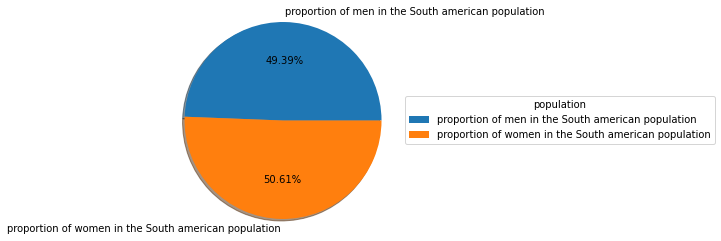

In [60]:
sizes = [pourcentage_popMale(popMale['South America'],contries['South America']),pourcentage_popMale(popFemale['South America'],contries['South America'])]
labels = ['proportion of men in the South american population','proportion of women in the South american population']

fig1,ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%2.2f%%',shadow=True, startangle=0)
ax1.legend(title="population", loc="center left", bbox_to_anchor=(0.85, 0, 0.5, 1))
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Amérique centrale

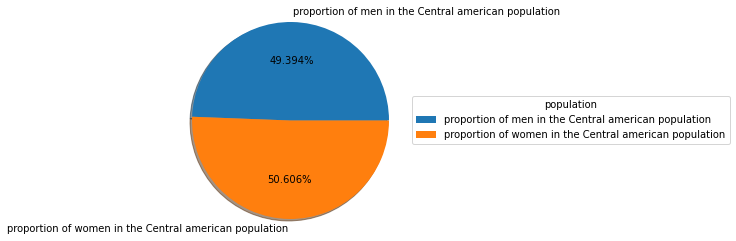

In [61]:
sizes = [pourcentage_popMale(popMale['Central America'],contries['Central America']),pourcentage_popMale(popFemale['Central America'],contries['Central America'])]
labels = ['proportion of men in the Central american population','proportion of women in the Central american population']

fig1,ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%3.3f%%',shadow=True, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(title="population", loc="center left", bbox_to_anchor=(0.85, 0, 0.5, 1))
plt.show()

# Oceanie

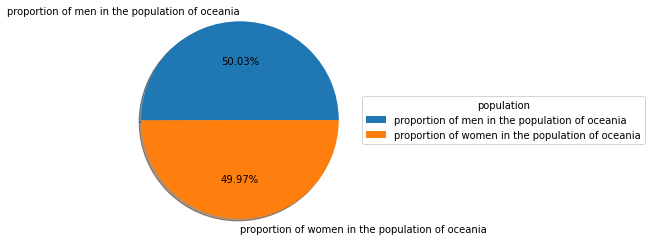

In [62]:
sizes = [pourcentage_popMale(popMale['Oceania'],contries['Oceania']),pourcentage_popMale(popFemale['Oceania'],contries['Oceania'])]
labels = ['proportion of men in the population of oceania','proportion of women in the population of oceania']

fig1,ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%2.2f%%',shadow=True, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(title="population", loc="center left", bbox_to_anchor=(0.85, 0, 0.5, 1))
plt.show()

# Monde

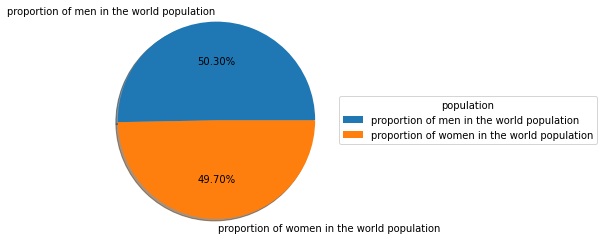

In [63]:
sizes = [pourcentage_popMale(data['PopMale'].sum(),data['PopTotal'].sum()),pourcentage_popMale(data['PopFemale'].sum(),data['PopTotal'].sum())]
labels = ['proportion of men in the world population','proportion of women in the world population']

fig1,ax1 = plt.subplots()
ax1.pie(sizes,labels=labels, autopct='%2.2f%%',shadow=True, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(title="population", loc="center left", bbox_to_anchor=(0.85, 0, 0.5, 1))
plt.show()

## now we will calculate the share of the population of each continent in the world population

## function 

In [64]:
def calc_monde(continent):
    return (continent/data['PopTotal'].sum()) * 100

In [65]:
cont_afrique = calc_monde(afrique)
cont_europe = calc_monde(Europe)
cont_asie = calc_monde(Asie)
cont_oceanie = calc_monde(contries['Oceania'])
cont_ameriqueC = calc_monde(contries['Central America'])
cont_ameriqueS = calc_monde(contries['South America'])
cont_ameriqueN = calc_monde(contries['Northern America'])

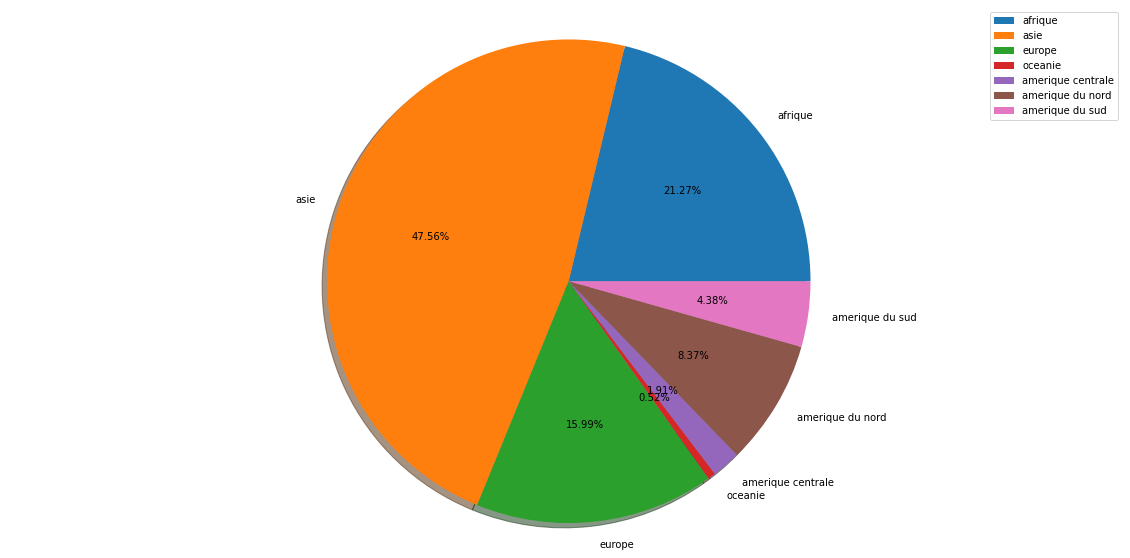

In [66]:
sizes = [cont_afrique,cont_asie,cont_europe,cont_oceanie,cont_ameriqueC,cont_ameriqueN,cont_ameriqueS]
Labels = ['afrique','asie','europe','oceanie','amerique centrale','amerique du nord','amerique du sud']

fig1,ax1 = plt.subplots(figsize=(20,10))
ax1.pie(sizes,labels=Labels, autopct='%2.2f%%',shadow=True, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend()
plt.show()

## we will observe the evolution of the population of each continent since 1950

In [67]:
Asia = data[data['LocID']==935]['PopMale']
Europe = data[data['LocID']==917]['PopMale']
Africa = data[data['LocID']==903]['PopMale']
Oceanie = data[data['LocID']==909]['PopMale']
americaCentral = data[data['LocID']==916]['PopMale']
americaSud = data[data['LocID']==931]['PopMale']
americaNord = data[data['LocID']==(905,918)]['PopMale']

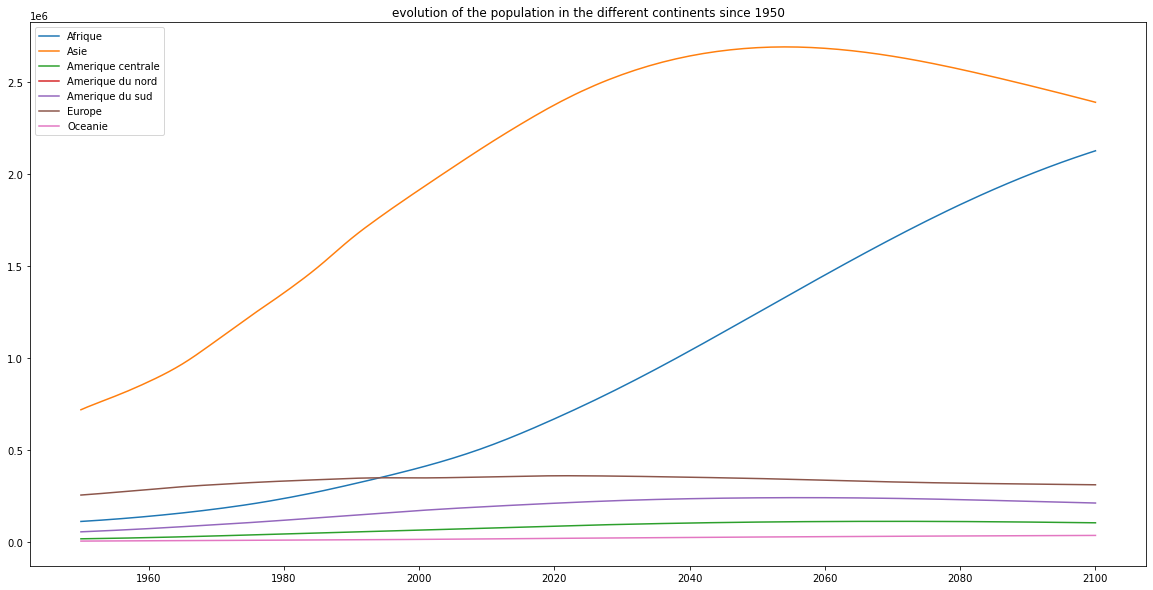

In [68]:
plt.figure(figsize=(20,10))
plt.plot(Africa, label="Afrique")
plt.plot(Asia, label="Asie")
plt.plot(americaCentral, label="Amerique centrale")
plt.plot(americaNord, label="Amerique du nord")
plt.plot(americaSud, label="Amerique du sud")
plt.plot(Europe, label='Europe')
plt.plot(Oceanie, label="Oceanie")
plt.title("evolution of the population in the different continents since 1950")
plt.legend()
plt.show()

## let's analyze the age category by sex

## Men

In [69]:
jeunes = data['PopMale_0_4'].sum() + data['PopMale_5_9'].sum() + data['PopMale_10_14'].sum() + data['PopMale_15_19'].sum()
adultes = data['PopMale_20_24'].sum() + data['PopMale_25_29'].sum() + data['PopMale_30_34'].sum() + data['PopMale_35_39'].sum() + data['PopMale_40_44'].sum() + data['PopMale_45_49'].sum()
vieux =  data['PopMale_50_54'].sum() + data['PopMale_55_59'].sum() + data['PopMale_60_64'].sum() + data['PopMale_65_69'].sum() + data['PopMale_70_74'].sum() + data['PopMale_75_79'].sum() + data['PopMale_80_84'].sum() + data['PopMale_85_89'].sum() + data['PopMale_90_94'].sum() + data['PopMale_95_99'].sum() + data['PopMale_100Plus'].sum()

In [70]:
print(f'nous avons {jeunes} de jeunes dans le monde')
print(f'nous avons {adultes} d\'adulte dans le monde')
print(f'nous avons {vieux} de vieux dans le monde')


nous avons 7285171330.389 de jeunes dans le monde
nous avons 9115912158.184998 d'adulte dans le monde
nous avons 6314243792.142 de vieux dans le monde


In [71]:
## calculons la part de chaque categorie dans la pop masculine

popMale = jeunes + adultes + vieux
part_jeunes = (jeunes/popMale)*100
part_adultes = (adultes/popMale)*100
part_vieux = (vieux/popMale)*100

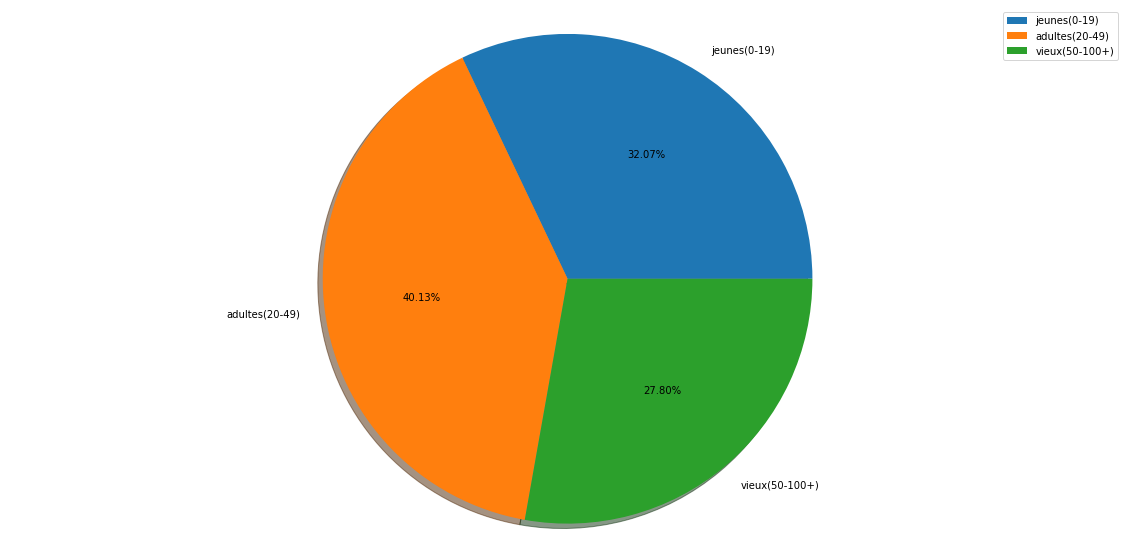

In [72]:
sizes = [part_jeunes,part_adultes,part_vieux]
Labels = ['jeunes(0-19)','adultes(20-49)','vieux(50-100+)']

fig1,ax1 = plt.subplots(figsize=(20,10))
ax1.pie(sizes,labels=Labels, autopct='%2.2f%%',shadow=True, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend()
plt.show()

# women

In [73]:
jeunes_femme = data['PopFemale_0_4'].sum() + data['PopFemale_5_9'].sum() + data['PopFemale_10_14'].sum() + data['PopFemale_15_19'].sum()
adultes_femme = data['PopFemale_20_24'].sum() + data['PopFemale_25_29'].sum() + data['PopFemale_30_34'].sum() + data['PopFemale_35_39'].sum() + data['PopFemale_40_44'].sum() + data['PopFemale_45_49'].sum()
vieille = data['PopFemale_50_54'].sum() + data['PopFemale_55_59'].sum() + data['PopFemale_60_64'].sum() + data['PopFemale_65_69'].sum() + data['PopFemale_70_74'].sum() + data['PopFemale_75_79'].sum() + data['PopFemale_80_84'].sum() + data['PopFemale_85_89'].sum() + data['PopFemale_90_94'].sum() + data['PopFemale_95_99'].sum() + data['PopFemale_100Plus'].sum()

In [74]:
popFemale = jeunes_femme + adultes_femme + vieille
part_jeunes_femme = (jeunes_femme/popFemale)*100
part_adultes_femme = (adultes_femme/popFemale)*100
part_vieille = (vieille/popFemale)*100

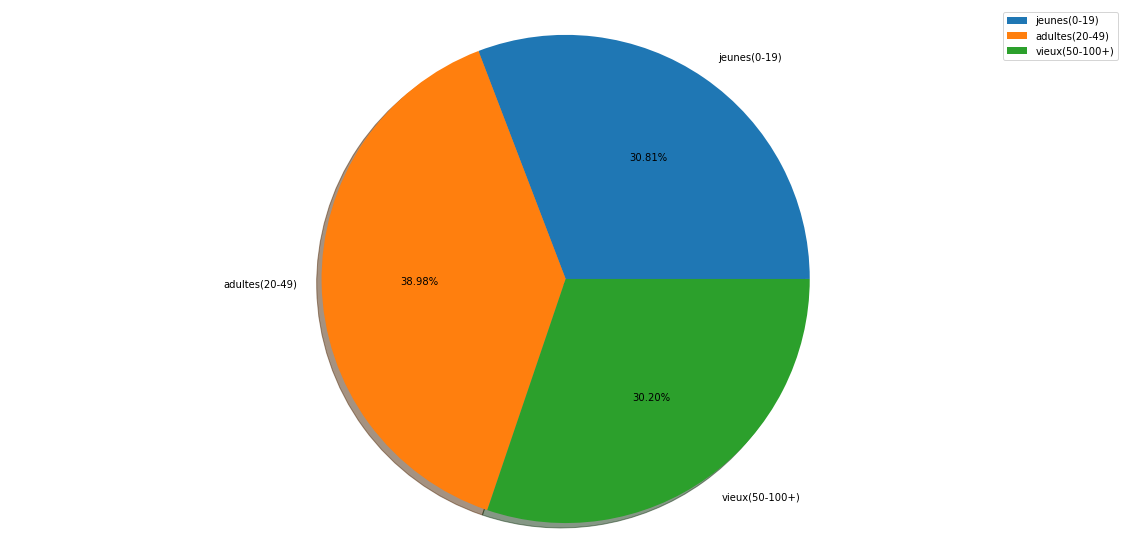

In [75]:
sizes = [part_jeunes_femme,part_adultes_femme,part_vieille]
Labels = ['jeunes(0-19)','adultes(20-49)','vieux(50-100+)']

fig1,ax1 = plt.subplots(figsize=(20,10))
ax1.pie(sizes,labels=Labels, autopct='%2.2f%%',shadow=True, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend()
plt.show()

## Globally

In [76]:
total_jeunes = jeunes_femme + jeunes
total_adulte = adultes + adultes_femme
total_vieux = vieux + vieille
pop_monde = data['PopTotal'].sum()

In [77]:
part_jeunes = (total_jeunes/pop_monde)*100
part_adultes = (total_adulte/pop_monde)*100
part_vieux = (total_vieux/pop_monde)*100

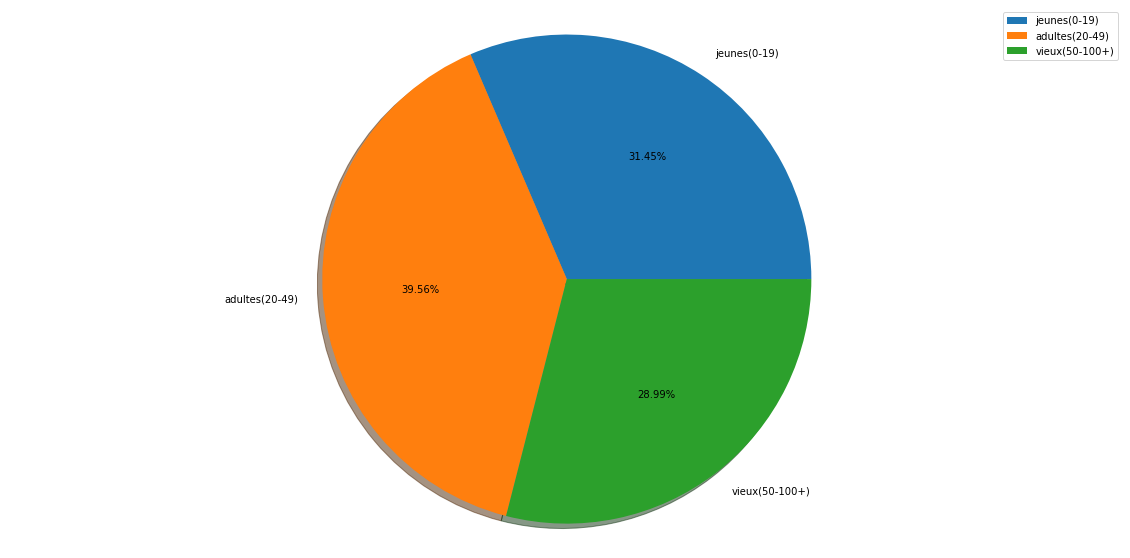

In [78]:
sizes = [part_jeunes,part_adultes,part_vieux]
Labels = ['jeunes(0-19)','adultes(20-49)','vieux(50-100+)']

fig1,ax1 = plt.subplots(figsize=(20,10))
ax1.pie(sizes,labels=Labels, autopct='%2.2f%%',shadow=True, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend()
plt.show()